# Linear Algebra (NumPy)

In [1]:
import cv2
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Contents in this notebook:

- Vectors
- Matrices
- Transpose of a matrix
- The inverse of a matrix
- The determinant of a matrix
- Eigenvalues
- Eigenvectors

# Vectors

We can use numpy `np.array` as vectors.

In [41]:
np.array([1,2,3])

array([1, 2, 3])

also you can use `np.ones` and `np.zeros` to instantiate arrays of ones and zeros respectively.

In [42]:
a = np.zeros((1,3))
b = np.ones((1,3))
print(a + b)

[[1. 1. 1.]]


Dot product of two vectors are calculated via `np.vdot` or `np.dot` or obviously `np.inner`. 


equivalently you can use `np.matmul` which is prefered function to calculate product of two matrix.

In [24]:
a = np.array([3, 5, 7])
b = np.array([4, 6, 8])
print(np.vdot(a, b))
print(np.matmul(a, b))
print(np.inner(a, b))
print(a@b)

98
98
98
98


Every vector in the vector space has a length except $0$-vector, and the terminology of length is **norm**, the general formula of norm of a vector in $\mathbb{R}^k$ is


$\|u\|= \sqrt{x_1^2+x_2^2+...+x_k^2}$

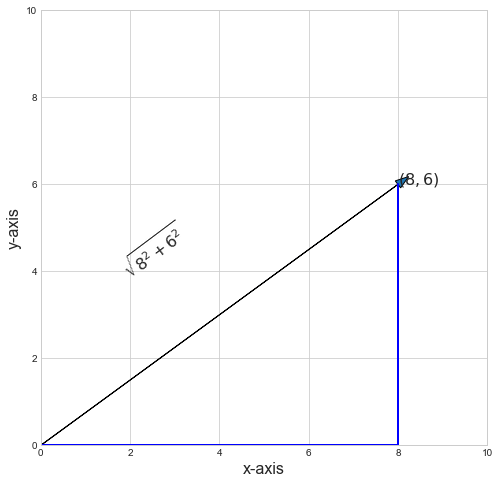

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
vec = np.array([0, 0, 8, 6])

ax.arrow(*vec, head_width=0.2)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_xlabel('x-axis', fontsize =16)
ax.set_ylabel('y-axis', fontsize =16)
ax.text(8, 6, '$(8, 6)$', fontsize = 16)

ax.plot([8, 8], [0, 6], c = 'b', lw = 2)
ax.plot([0, 8], [0, 0], c= 'b', lw = 2)


ax.text(1.7, 3.8, '$\sqrt{8^2+6^2}$', fontsize = 16, rotation = np.arctan(6/8)*180/np.pi)
plt.show()

There is a NumPy function for computing norms: `np.linalg.norm`.

In [3]:
a = np.array([8, 6])
a_norm = np.linalg.norm(a)
print(f'Norm of a is {a_norm}.')

Norm of a is 10.0.


# Matrices

The data type to represent matrices in numpy is `ndarray`. you can instansiate a random one with `np.empty` specifying the desired shape of the matrix.


note: since `np.empty` uses current memory state, results may vary on each run.

In [2]:
mat = np.empty((3, 2, 4))
print(mat)

[[[0.2  0.2  0.6  1.  ]
  [0.   0.6  1.   1.  ]]

 [[0.   0.8  0.4  1.  ]
  [1.   1.   0.6  1.  ]]

 [[0.5  0.36 0.33 1.  ]
  [1.   1.   1.   1.  ]]]


In [3]:
print('total number of elements in matrix(ndarrays in general)', mat.size)
print('number of dimensions', mat.ndim)
print('shape of the matrix', mat.shape)

total number of elements in matrix(ndarrays in general) 24
number of dimensions 3
shape of the matrix (3, 2, 4)


Also you can reshape the matrix.

In [4]:
mat = np.arange(24).reshape(3, 2, 4)

In [5]:
mat.reshape(2, 4, 3)

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]]])

# Transpose of a matrix

Matrices can be transposed simply by calling `transpose` on a NumPy `ndarray`.

In [6]:
mat = np.arange(12).reshape(3, 4)
mat.transpose()

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

# The inverse of a matrix

Inverse of invertible matrices can be calculated using `np.linalg.inv` or pseudo-inverses can be done by `np.linalg.pinv` which is based on Moore-Penrose algorithm for non-invertible matrices.

In [7]:
mat = np.arange(1, 5).reshape(2, 2)
inv = np.linalg.inv(mat)
print(np.dot(mat, inv))

[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


this discrepency is due to broadcasting rules but the resulting matrix is close to identity matrix

<a href='https://numpy.org/doc/stable/reference/routines.linalg.html#module-numpy.linalg'>read more</a>

In [42]:
print(np.allclose(np.dot(mat, inv), np.eye(2)))

True


In [43]:
a = np.random.randn(9, 6)
B = np.linalg.pinv(a)
np.allclose(a, np.dot(a, np.dot(B, a)))

True

# The determinant of a matrix

Determinant of a matrix simply can be calculated via `np.linalg.det` based on LU factorization using LAPACK routine.

Note: broadcasting rules also apply here.

In [44]:
a = np.array([[1, 2], [3, 4]])
np.linalg.det(a)

-2.0000000000000004

using SVD method, NumPy also calculates rank of a matrix, `np.linalg.matrix_rank`.

Rank of the matrix is the number of singular values of the array that are greater than a threshold (*tol*).

In [45]:
np.linalg.matrix_rank(np.eye(4)) # Full rank matrix

4

In [46]:
I=np.eye(4) # rank deficient matrix
I[-1,-1] = 0. 
np.linalg.matrix_rank(I)

3

# Eigenvalues & Eigenvectors

> In linear algebra, an eigenvector or characteristic vector of a linear transformation is a nonzero vector that changes at most by a scalar factor when that linear transformation is applied to it. The corresponding eigenvalue, often denoted by $\lambda$, is the factor by which the eigenvector is scaled.

Let $A$ be a linear transformation represented by a matrix $A$. If there is a vector $X \in R^n \ne 0$ such that

 $AX=\lambda X$

for some scalar $\lambda$ , then $\lambda$ is called the eigenvalue of $A$ with corresponding (right) eigenvector $X$.

Eigenvector has a special property that preserves the pointing direction after linear transformation.To illustrate the idea, let's plot a 'circle' and arrows touching edges of circle.

Start from one arrow. If you want to draw a smoother circle, you can use parametric function rather two quadratic functions, because cicle can't be draw with one-to-one mapping.But this is not the main issue, we will live with that.

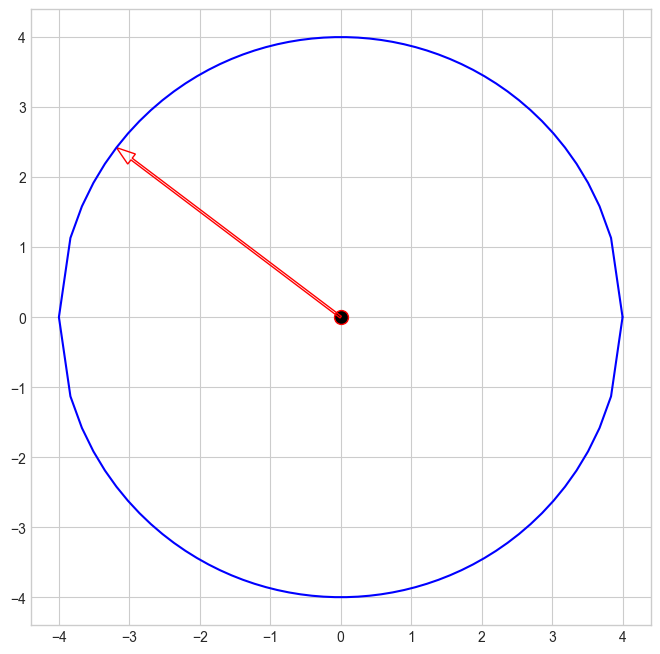

In [44]:
import numpy.linalg as LA
plt.style.use('seaborn-whitegrid')

x = np.linspace(-4, 4)
y_u = np.sqrt(16 - x**2)
y_d = -np.sqrt(16 - x**2)

fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(x, y_u, color = 'b')
ax.plot(x, y_d, color = 'b')

ax.scatter(0, 0, s = 100, fc = 'k', ec = 'r')

ax.arrow(0, 0, x[5], y_u[5], head_width = .18, 
         head_length= .27, length_includes_head = True, 
         width = .03, ec = 'r', fc = 'None')
plt.show()

Now, the same 'circle', but more arrows.

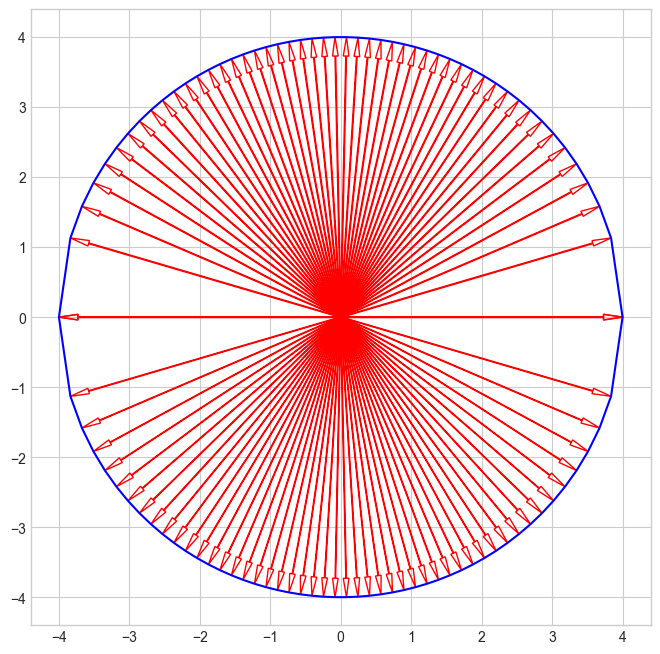

In [37]:
x = np.linspace(-4, 4, 50)
y_u = np.sqrt(16 - x**2)
y_d = -np.sqrt(16 - x**2)

fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(x, y_u, color = 'b')
ax.plot(x, y_d, color = 'b')

ax.scatter(0, 0, s = 100, fc = 'k', ec = 'r')

for i in range(len(x)):
    ax.arrow(0, 0, x[i], y_u[i], head_width = .08, 
             head_length= .27, length_includes_head = True,
             width = .01, ec = 'r', fc = 'None')
    ax.arrow(0, 0, x[i], y_d[i], head_width = .08, 
             head_length= .27, length_includes_head = True, 
             width = .008, ec = 'r', fc = 'None')

    
Now we will perform linear transformation on the circle. Technically, we can only transform the points - the arrow tip - that we specify on the circle.

We create a matrix

$
A = 
\left[\begin{matrix}
3 \; -2\\
1 \; 0
\end{matrix}\right]
$

Align all the coordinates into two matrices for upper and lower half respectively.

$ V_u = \left[\begin{matrix} x_1^u & x_2^u & \ldots & x_m^u\\ y_1^u & y_2^u & \ldots & y_m^u \end{matrix}\right]\\ V_d = \left[\begin{matrix} x_1^d & x_2^d & \ldots & x_m^d\\ y_1^d & y_2^d & \ldots & y_m^d \end{matrix}\right] $

The matrix multiplication $AV_u$ and $AV_d$ are linear transformation of the circle.

In [38]:
A = np.array([[3, -2], [1, 0]])

Vu = np.hstack((x[:, np.newaxis], y_u[:, np.newaxis]))
AV_u = (A@Vu.T)

Vd = np.hstack((x[:, np.newaxis], y_d[:, np.newaxis]))
AV_d = (A@Vd.T)

The circle becomes an ellipse. However, if you watch closely, you will find there are some arrows still pointing the same direction after linear transformation.

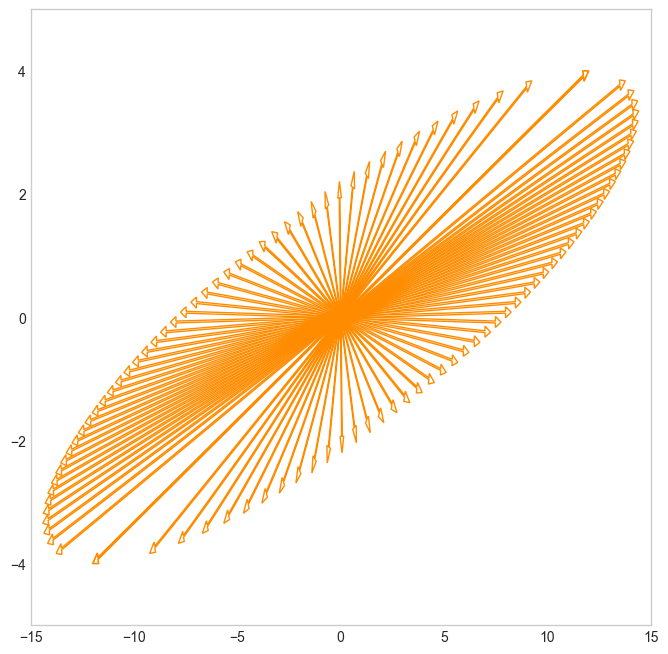

In [42]:
fig, ax = plt.subplots(figsize = (8, 8))

A = np.array([[3, -2], [1, 0]])

v = np.hstack((x[:, np.newaxis], y_u[:, np.newaxis]))
Av_1 = (A@v.T)

v = np.hstack((x[:, np.newaxis], y_d[:, np.newaxis]))
Av_2 = (A@v.T)

for i in range(len(x)):
    ax.arrow(0, 0, Av_1[0, i], Av_1[1, i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'darkorange', fc = 'None')
    ax.arrow(0, 0, Av_2[0, i], Av_2[1, i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'darkorange', fc = 'None')    
ax.axis([-15, 15, -5, 5])
ax.grid()
plt.show()

We can plot the cirle and ellipse together, those vectors pointing the same direction before and after the linear transformation are eigenvector of $A$, eigenvalue is the length ratio between them.

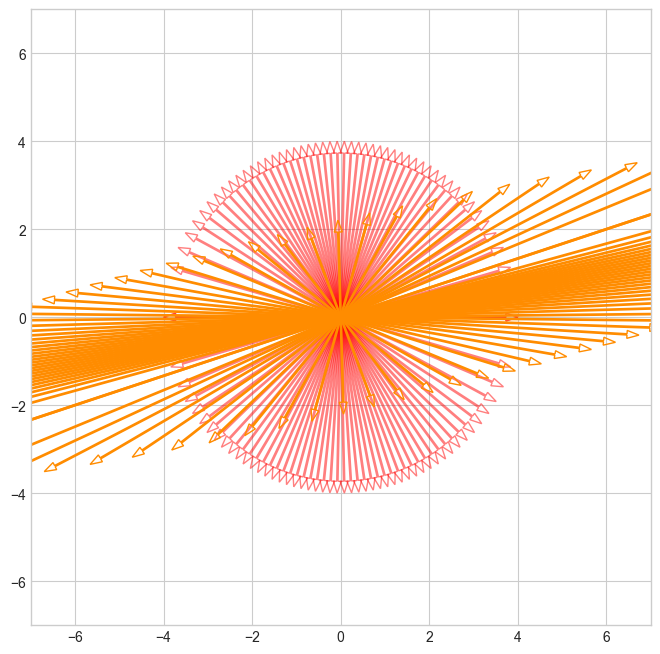

In [43]:

k = 50
x = np.linspace(-4, 4, k)
y_u = np.sqrt(16 - x**2)
y_d = -np.sqrt(16 - x**2)

fig, ax = plt.subplots(figsize = (8, 8))

ax.scatter(0, 0, s = 100, fc = 'k', ec = 'r')

for i in range(len(x)):
    ax.arrow(0, 0, x[i], y_u[i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'r', alpha = .5, fc = 'None')
    ax.arrow(0, 0, x[i], y_d[i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'r', alpha = .5, fc = 'None')



for i in range(len(x)):
    ax.arrow(0, 0, Av_1[0, i], Av_1[1, i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'darkorange', fc = 'None')
    ax.arrow(0, 0, Av_2[0, i], Av_2[1, i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'darkorange', fc = 'None')    
n = 7
ax.axis([-n, n, -n, n])
plt.show()

[Credits of these visualizations](https://github.com/MacroAnalyst/Linear_Algebra_With_Python/blob/master/Chapter%2012%20-%20Eigenvalues%20and%20Eigenvectors.ipynb)

## Eigendecomposition

We can decompose a given matrix A into it's eigenvectors and eigen values

$A=QΛQ^{−1}$

where Q is the eigenvectors matrix and $Λ$ is the diagonalised eigenvalues.

In [33]:
A = np.empty((4, 4))
print(A)

[[1. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 4.]]


In [34]:
Lambda, X = np.linalg.eig(A)
print(Lambda, X, sep='\n')

[1. 2. 3. 4.]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [35]:
np.allclose(A, X * np.diag(Lambda) * np.linalg.inv(X))

True

# Bonus (SVD Factorization)

As a bonus here we use SVD algorithm to reconstruct an image. as we already know, every matrix can be factorized as $A_{(M*N)}=U_{(M*R)} \Sigma_{(R*R)} V^T_{(R*N)}$ where $U$ and $V^T$ are left and right singular vectors of the matrix A respectively and $\Sigma$ is a diagonal  matrix with singular values of A on its diagonal.


Note: it's assumed for the $\Sigma$ to have singular values in a decreasing order on it's diagonal


Here we consider the image as the matrix A (M\*N), and to reconstruct the image, we should pick the n first singular values and their corresponding vectors and the image is reconstructed by their product. The more elements you pick, the image will look closer to the original as we'll see.

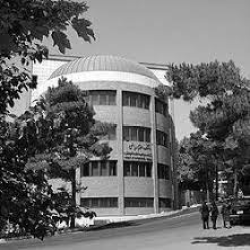

In [9]:
img = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (250, 250), interpolation = cv2.INTER_AREA).astype('uint8')
Image.fromarray(img)

With `np.linalg.svd` we can factorize the input.

In [10]:
u, s, v = np.linalg.svd(img, full_matrices=False)
 
print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape:{v.shape}')

u.shape:(250, 250),s.shape:(250,),v.shape:(250, 250)


Now we'll see that the variance explained by singular values are aranged in a decreasing order along the $\Sigma$ 's diagonal, and also that a large portion of the variance is explained by a few first one of them.

variance Explained by Top 20 singular values:
[0.856477 0.035242 0.020756 0.016459 0.007038 0.006927 0.005361 0.004284
 0.003753 0.003014 0.002601 0.002228 0.001997 0.001866 0.001812 0.001551
 0.001527 0.001352 0.001229 0.001102]


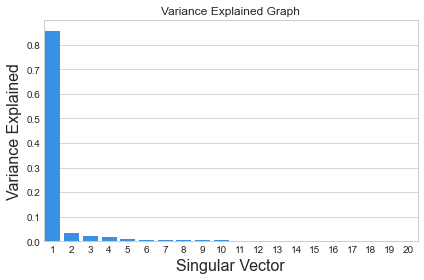

In [11]:
var_explained = np.round(s**2/np.sum(s**2), decimals=6)
 
print(f'variance Explained by Top 20 singular values:\n{var_explained[0:20]}')
 
sns.barplot(x=list(range(1, 21)),
            y=var_explained[0:20], color="dodgerblue")
 
plt.title('Variance Explained Graph')
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()
plt.show()

Now we'll reconstruct the image with the desired number of components. As the plot demonstrates, reconstructed image with one component is a vague image, but explains 85% of the variance, and as we further increase the components, the details in image increases and looks closer to the actual image.

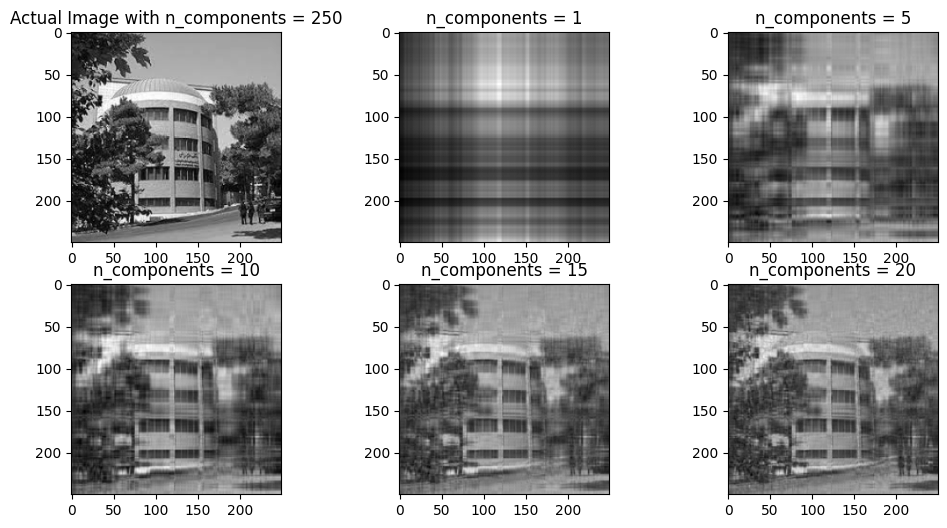

In [29]:
comps = [250, 1, 5, 10, 15, 20]

plt.style.use('default')
plt.figure(figsize=(12, 6))
 
for i in range(len(comps)):
    low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :]
     
    if(i == 0):
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'Actual Image with n_components = {comps[i]}')
     
    else:
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'n_components = {comps[i]}')

## References 
- [Data Science course SBU, Fall 2021](https://sk7w4tch3r.github.io/CS-SBU-DataScience/)